<a href="https://colab.research.google.com/github/Manahil4/ML_Labs/blob/main/ML_Lab_06_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Heart Dataset

File name: 'D6_Heart_Dataset_2.csv'

This dataset has been obtained from Kaggle.

The dataset contains 303 observations with 13 features and 1 class label with 0 and 1 values.
These features are discussed below:
1. age: in years
2. sex: (1 = male; 0 = female)
3. cp: chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
4. trestbps: resting blood pressure, in mm Hg on admission to the hospital
5. chol: serum cholestrol in mg/dl
6. fbs: fasting blood sugar, 120 mg.dl (1 = true; 0 = false)
7. restecg: restinng electrocardiographic results (values: 0,1,2)
8. thalach: maximum heart ache achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) coloured by flouroscopy
13. thal: (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. target: the predicted attribute, diagnosis of heart disease (0 = fit; 1 = diseased)

This is a binary classification problem.
Does not contain any categorical data, the dataset is clean. sed)

In [5]:
# Loading and exploring dataset
import pandas as pd
from google.colab import files
uploaded = files.upload()
#Displaying the read contents


Saving D6_Heart_Dataset_2 (2).csv to D6_Heart_Dataset_2 (2).csv


In [6]:
data= pd.read_csv('D6_Heart_Dataset_2 (2).csv')

In [8]:
# separating predictors and target
X = data.drop("target",axis=1) #predictors
Y = data["target"]  #target

In [9]:
# Splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.20,random_state=0)

## Logistic Regression

### Model 1 - Without Data Scaling

In [10]:
%%time
# Create logistic regression object
from sklearn.linear_model import LogisticRegression
logistic_regression1 = LogisticRegression(solver="liblinear",
                                         random_state=0)
# try different values for max_iter and observe the difference in training time

# Train model
model1 = logistic_regression1.fit(X_train, Y_train)
#Predictions
Y_pred1 = model1.predict(X_test)

CPU times: user 160 ms, sys: 15.7 ms, total: 175 ms
Wall time: 250 ms


In [11]:
# Printing results
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred1)*100)+"%")
print(confusion_matrix(Y_test, Y_pred1))
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred1, target_names=target_names))

The accuracy is 85.24590163934425%
[[22  5]
 [ 4 30]]
              precision    recall  f1-score   support

     class 0       0.85      0.81      0.83        27
     class 1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [12]:
Y_pred1

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [13]:
model1.predict_proba(X_test)

array([[0.95114361, 0.04885639],
       [0.17335757, 0.82664243],
       [0.16406719, 0.83593281],
       [0.97580266, 0.02419734],
       [0.89183074, 0.10816926],
       [0.54710265, 0.45289735],
       [0.94644902, 0.05355098],
       [0.8754798 , 0.1245202 ],
       [0.99460165, 0.00539835],
       [0.99607695, 0.00392305],
       [0.21079693, 0.78920307],
       [0.07048059, 0.92951941],
       [0.9648454 , 0.0351546 ],
       [0.14944869, 0.85055131],
       [0.04166592, 0.95833408],
       [0.32294482, 0.67705518],
       [0.93458722, 0.06541278],
       [0.27288922, 0.72711078],
       [0.99327262, 0.00672738],
       [0.14516413, 0.85483587],
       [0.17632504, 0.82367496],
       [0.71134284, 0.28865716],
       [0.92540996, 0.07459004],
       [0.90062174, 0.09937826],
       [0.14616612, 0.85383388],
       [0.5323902 , 0.4676098 ],
       [0.80526983, 0.19473017],
       [0.66199728, 0.33800272],
       [0.02696567, 0.97303433],
       [0.34701077, 0.65298923],
       [0.

### Model 2 - With Data Scaling

In [ ]:
#Let us see values in X_train
X_train

In [ ]:
# Standardizing train data
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()
X_train_standardized=pd.DataFrame(standard_scaler.fit_transform(X_train)) # returns standardized array
X_train_standardized

# Normalizing train data
#normal_scaler = preprocessing.MinMaxScaler()
#X_train_normalized=pd.DataFrame(normal_scaler.fit_transform(X_train)) # returns standardized array
#X_train_normalized

In [ ]:
# Standardizing test data
X_test_standardized=pd.DataFrame(standard_scaler.fit_transform(X_test))
X_test_standardized

#Normalizing test data
#X_test_normalized=pd.DataFrame(normal_scaler.fit_transform(X_test)) # returns standardized array
#X_test_normalized

In [ ]:
%%time
# Create logistic regression object
logistic_regression2 = LogisticRegression(solver="liblinear",
                                         random_state=0)
# try different values for max_iter and observe the difference in training time

# Train model
model2 = logistic_regression2.fit(X_train_standardized, Y_train)
#Predictions
Y_pred2 = model2.predict(X_test_standardized)

In [ ]:
# # Printing results

print("The accuracy is "+str(metrics.accuracy_score(Y_test,Y_pred2)*100)+"%")
print(confusion_matrix(Y_test, Y_pred2))
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred2, target_names=target_names))

##Q1: Analyze the performance of Logistic Regression on the Heart dataset



Heart Dataset Performance:
Accuracy: 85.25%
Precision: 0.87
Recall: 0.84
F1 Score: 0.86
ROC AUC: 0.93

Confusion Matrix:
 [[25  4]
 [ 5 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



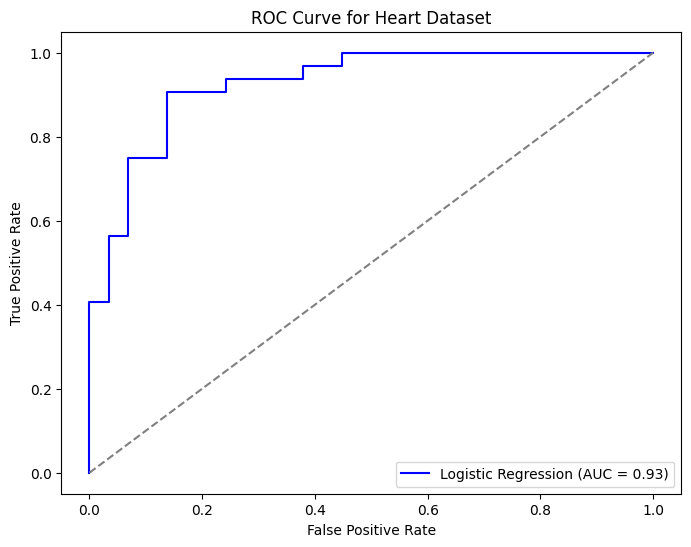

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report

# Load the Heart dataset
heart_data = pd.read_csv("D6_Heart_Dataset_2 (2).csv")  # Ensure you have heart.csv file
X_heart = heart_data.drop(columns=["target"])
y_heart = heart_data["target"]

# Split the dataset
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_heart = scaler.fit_transform(X_train_heart)
X_test_heart = scaler.transform(X_test_heart)

# Train Logistic Regression model
log_reg_heart = LogisticRegression(solver="liblinear", random_state=0)
log_reg_heart.fit(X_train_heart, y_train_heart)

# Predictions
y_pred_heart = log_reg_heart.predict(X_test_heart)
y_prob_heart = log_reg_heart.predict_proba(X_test_heart)[:, 1]

# Performance metrics
accuracy = accuracy_score(y_test_heart, y_pred_heart)
precision = precision_score(y_test_heart, y_pred_heart)
recall = recall_score(y_test_heart, y_pred_heart)
f1 = f1_score(y_test_heart, y_pred_heart)
fpr, tpr, _ = roc_curve(y_test_heart, y_prob_heart)
roc_auc = auc(fpr, tpr)

print(f"Heart Dataset Performance:")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test_heart, y_pred_heart))
print("\nClassification Report:\n", classification_report(y_test_heart, y_pred_heart))

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Heart Dataset")
plt.legend()
plt.show()


##Q2: Test Logistic Regression on Spambase dataset and compare with Heart dataset


In [16]:
from google.colab import files
uploaded = files.upload()


Saving spambase.csv to spambase.csv


In [20]:
# Load the Spambase dataset
spambase_data = pd.read_csv("spambase.csv")  # Ensure you have spambase.csv file
X_spam = spambase_data.drop(columns=["spam"])
y_spam = spambase_data["spam"]

# Split the dataset
X_train_spam, X_test_spam, y_train_spam, y_test_spam = train_test_split(X_spam, y_spam, test_size=0.2, random_state=42)

# Standardize the features
X_train_spam = scaler.fit_transform(X_train_spam)
X_test_spam = scaler.transform(X_test_spam)

# Train Logistic Regression model
log_reg_spam = LogisticRegression(solver="liblinear", random_state=0)
log_reg_spam.fit(X_train_spam, y_train_spam)

# Predictions
y_pred_spam = log_reg_spam.predict(X_test_spam)
y_prob_spam = log_reg_spam.predict_proba(X_test_spam)[:, 1]

# Performance metrics
accuracy_spam = accuracy_score(y_test_spam, y_pred_spam)
precision_spam = precision_score(y_test_spam, y_pred_spam)
recall_spam = recall_score(y_test_spam, y_pred_spam)
f1_spam = f1_score(y_test_spam, y_pred_spam)
fpr_spam, tpr_spam, _ = roc_curve(y_test_spam, y_prob_spam)
roc_auc_spam = auc(fpr_spam, tpr_spam)

print(f"Spambase Dataset Performance:")
print(f"Accuracy: {accuracy_spam*100:.2f}%")
print(f"Precision: {precision_spam:.2f}")
print(f"Recall: {recall_spam:.2f}")
print(f"F1 Score: {f1_spam:.2f}")
print(f"ROC AUC: {roc_auc_spam:.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test_spam, y_pred_spam))
print("\nClassification Report:\n", classification_report(y_test_spam, y_pred_spam))

# Compare with Heart dataset
print("\nComparison of Logistic Regression Performance:")
print(f"{'Metric':<15}{'Heart':<10}{'Spambase'}")
print(f"{'-'*40}")
print(f"Accuracy:       {accuracy*100:.2f}%     {accuracy_spam*100:.2f}%")
print(f"Precision:      {precision:.2f}        {precision_spam:.2f}")
print(f"Recall:         {recall:.2f}        {recall_spam:.2f}")
print(f"F1 Score:       {f1:.2f}        {f1_spam:.2f}")
print(f"ROC AUC:        {roc_auc:.2f}        {roc_auc_spam:.2f}")


Spambase Dataset Performance:
Accuracy: 91.86%
Precision: 0.93
Recall: 0.87
F1 Score: 0.90
ROC AUC: 0.97

Confusion Matrix:
 [[506  25]
 [ 50 340]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921


Comparison of Logistic Regression Performance:
Metric         Heart     Spambase
----------------------------------------
Accuracy:       85.25%     91.86%
Precision:      0.87        0.93
Recall:         0.84        0.87
F1 Score:       0.86        0.90
ROC AUC:        0.93        0.97


##Q3: Compare Logistic Regression, Naïve Bayes, and kNN on Heart and Spambase datasets

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(solver="liblinear", random_state=0),
    "Naïve Bayes": GaussianNB(),
    "kNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

datasets = {
    "Heart": (X_train_heart, X_test_heart, y_train_heart, y_test_heart),
    "Spambase": (X_train_spam, X_test_spam, y_train_spam, y_test_spam)
}

# Evaluate models on both datasets
for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    print(f"\nPerformance on {dataset_name} dataset:")
    print(f"{'Model':<20}{'Accuracy':<10}{'Precision':<10}{'Recall':<10}{'F1 Score':<10}")
    print("-" * 60)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"{model_name:<20}{acc*100:.2f}%      {prec:.2f}      {rec:.2f}      {f1:.2f}")



Performance on Heart dataset:
Model               Accuracy  Precision Recall    F1 Score  
------------------------------------------------------------
Logistic Regression 85.25%      0.87      0.84      0.86
Naïve Bayes         86.89%      0.90      0.84      0.87
kNN (k=5)           90.16%      0.93      0.88      0.90

Performance on Spambase dataset:
Model               Accuracy  Precision Recall    F1 Score  
------------------------------------------------------------
Logistic Regression 91.86%      0.93      0.87      0.90
Naïve Bayes         82.19%      0.72      0.94      0.82
kNN (k=5)           89.36%      0.90      0.84      0.87
